## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [11]:
df = pd.read_csv('QueryResults.csv')


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [20]:
df.head()
df.tail()

,m,TagName,Unnamed: 2
2630,2024-05-01 00:00:00,php,1207
2631,2024-05-01 00:00:00,python,7136
2632,2024-05-01 00:00:00,r,1396
2633,2024-05-01 00:00:00,ruby,121
2634,2024-05-01 00:00:00,swift,644


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [12]:
df.shape

(2635, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [14]:
df.count()


m             2635
TagName       2635
Unnamed: 2    2635
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [22]:
df.groupby('TagName').sum()

,m,Unnamed: 2
TagName,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,44491
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,404637
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1616917
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,807923
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51987
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,73111
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1917242
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2528582
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68121


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [23]:
df.groupby('TagName').count()

,m,Unnamed: 2
TagName,,
assembly,190,190
c,190,190
c#,191,191
c++,190,190
delphi,190,190
go,175,175
java,190,190
javascript,190,190
perl,190,190


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [38]:
df['m'][1]
df.m[1]

Timestamp('2008-08-01 00:00:00')

In [39]:
type(df.m[1])

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
df.m = pd.to_datetime(df.m)

## Data Manipulation



In [44]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,503
4,2008-08-01,c++,164


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [43]:
df.tail()

,m,TagName,Unnamed: 2
2630,2024-05-01,php,1207
2631,2024-05-01,python,7136
2632,2024-05-01,r,1396
2633,2024-05-01,ruby,121
2634,2024-05-01,swift,644


In [46]:
reshaped_df = df.pivot(index='m', columns='TagName', values='Unnamed: 2')

In [47]:
reshaped_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1128.0,634.0,130.0,474.0,536.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,806.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,176.0,817.0,2671.0,1573.0,88.0,340.0,2853.0,5085.0,33.0,1384.0,7699.0,1798.0,162.0,860.0
2024-02-01,132.0,763.0,2687.0,1434.0,110.0,305.0,2767.0,4727.0,36.0,1295.0,7781.0,1822.0,157.0,667.0
2024-03-01,139.0,736.0,2586.0,1338.0,98.0,325.0,2824.0,4721.0,47.0,1362.0,7369.0,1686.0,139.0,721.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [52]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1128.0,634.0,130.0,474.0,536.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,806.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN


In [53]:
reshaped_df.fillna(0, inplace=True)

In [54]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,13.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1128.0,634.0,130.0,474.0,536.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,806.0,112.0,0.0,1148.0,722.0,128.0,604.0,506.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0


In [55]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

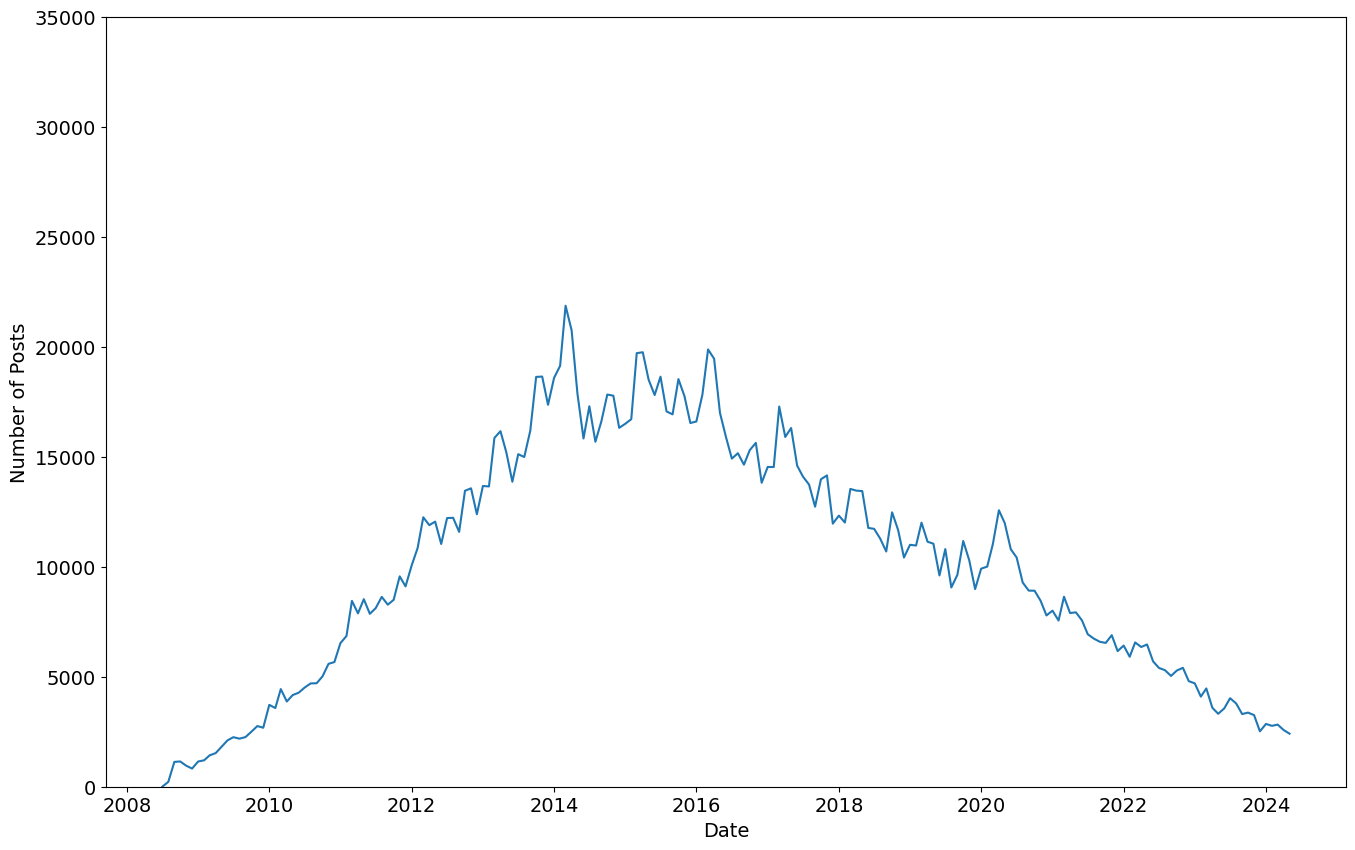

In [71]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

plt.plot(reshaped_df.index, reshaped_df.java, label='Java')
plt.plot(reshaped_df.index, reshaped_df.python, label='Python')
plt.legend(fontsize=16)

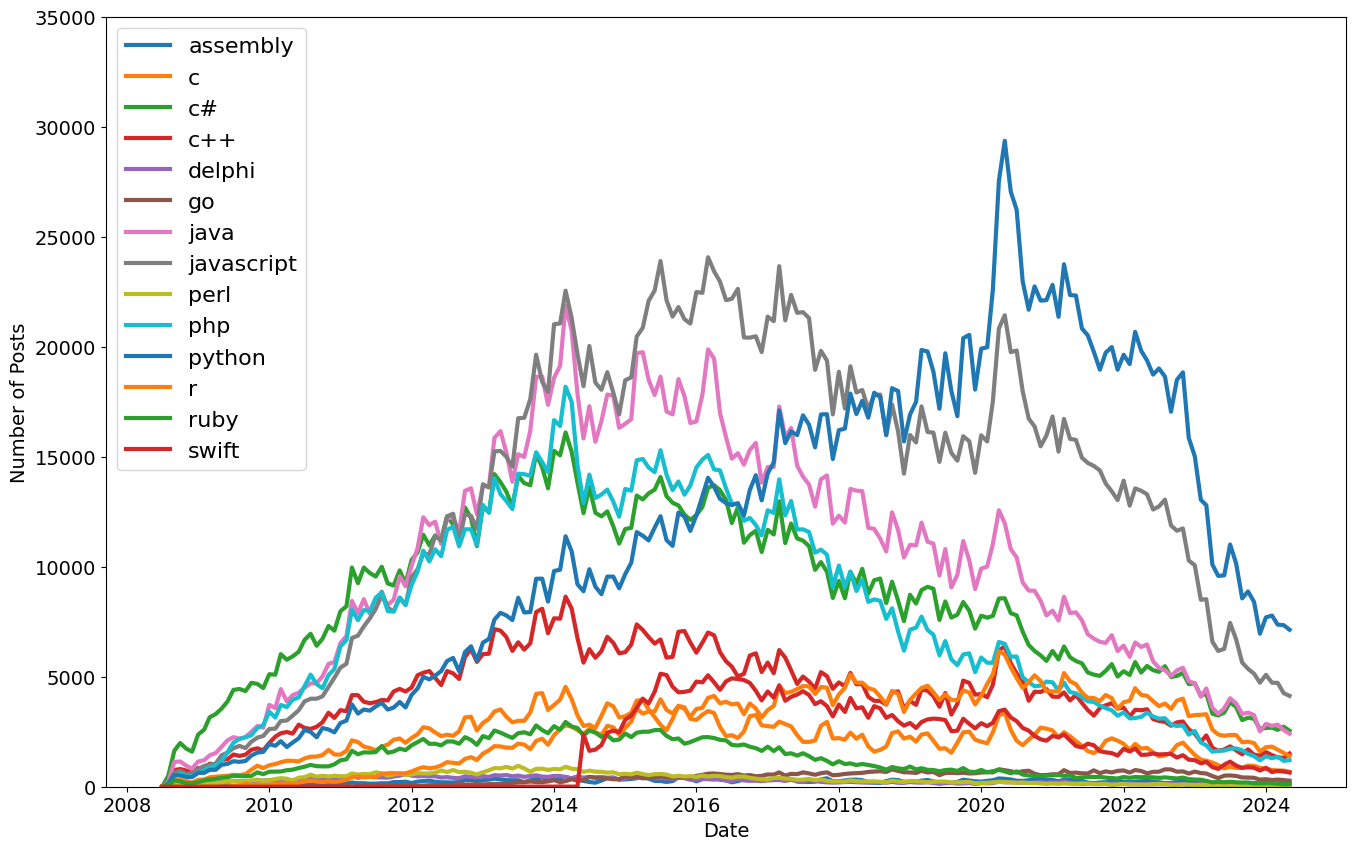

In [79]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

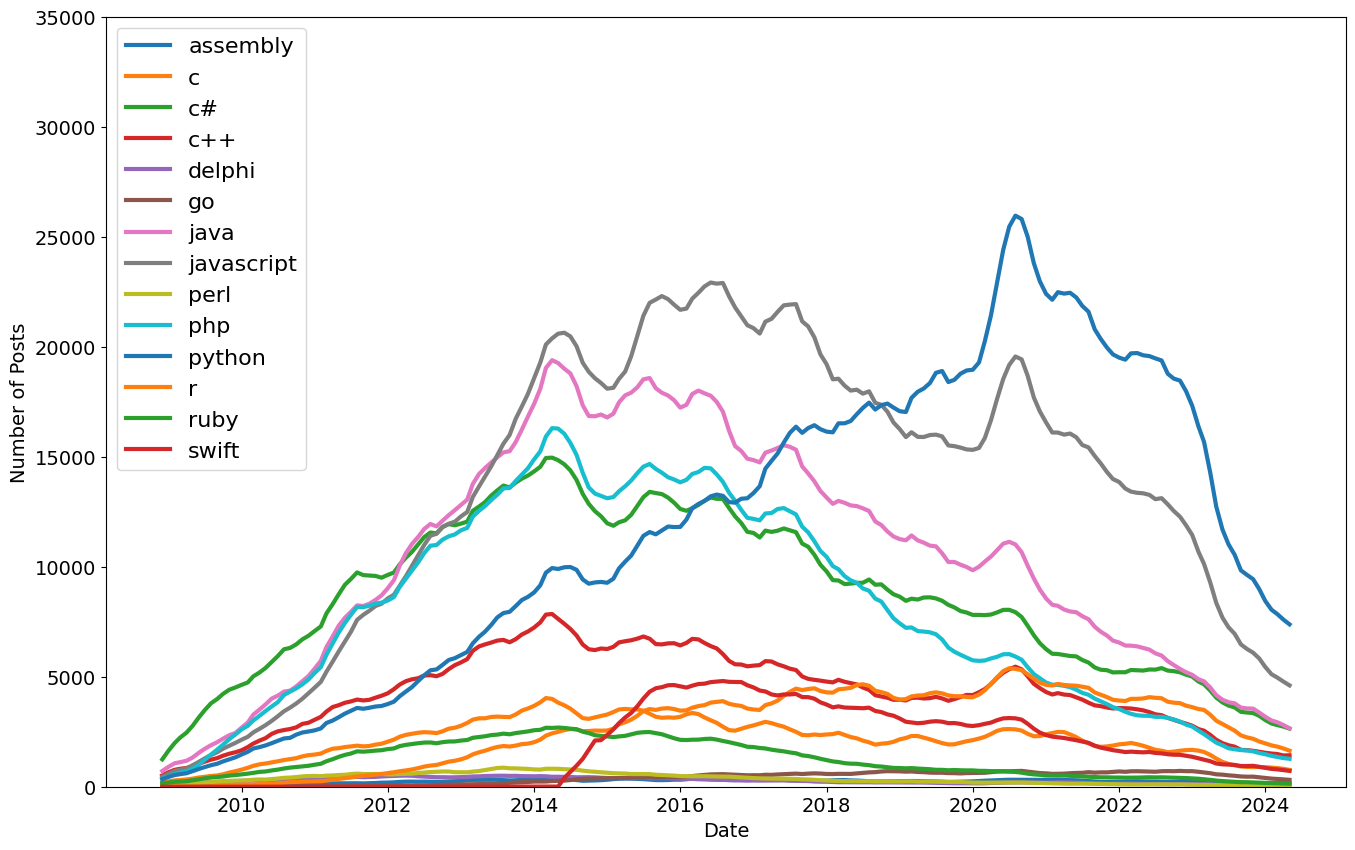

In [83]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)